# 1- Import Libs


In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
from collections.abc import Hashable
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

# 2- Loading Data

In [22]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


# 3- Understanding Data

In [23]:
data.shape

(768, 9)

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [182]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<AxesSubplot:>

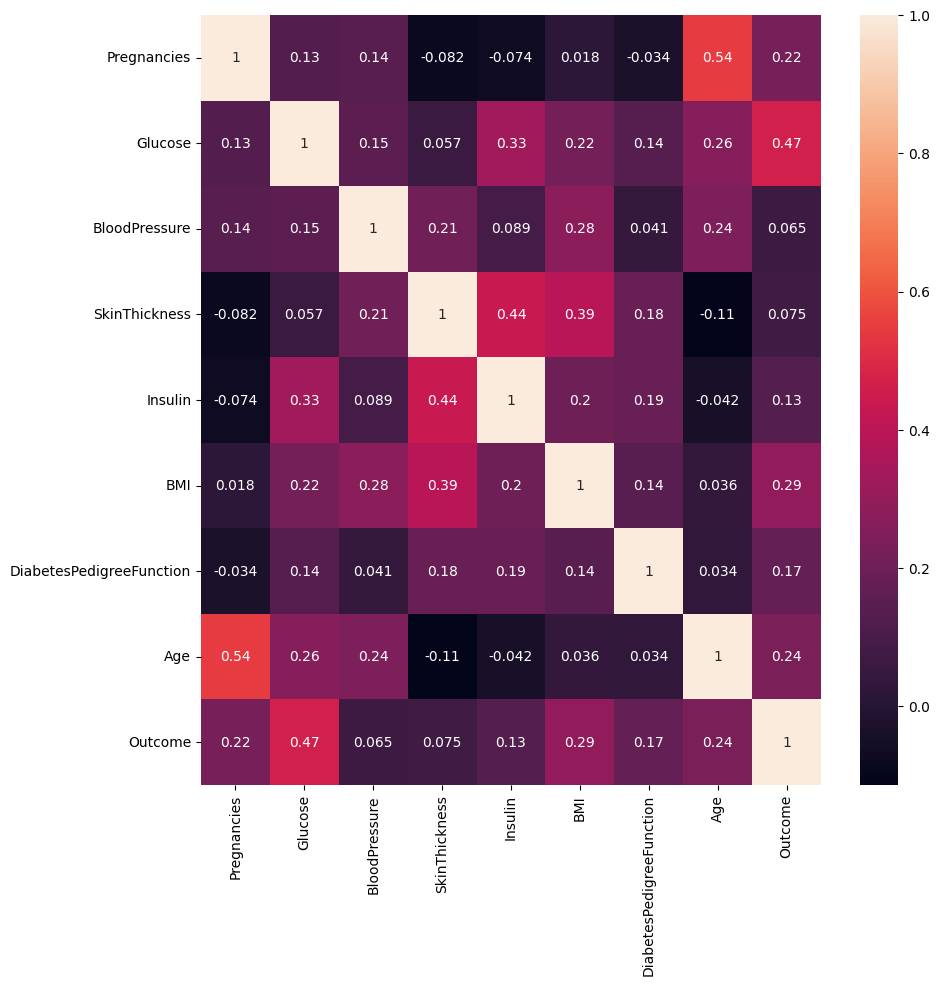

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [143]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [26]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 4- EDA

In [291]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'red'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'red'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
target_count()
target_percent()

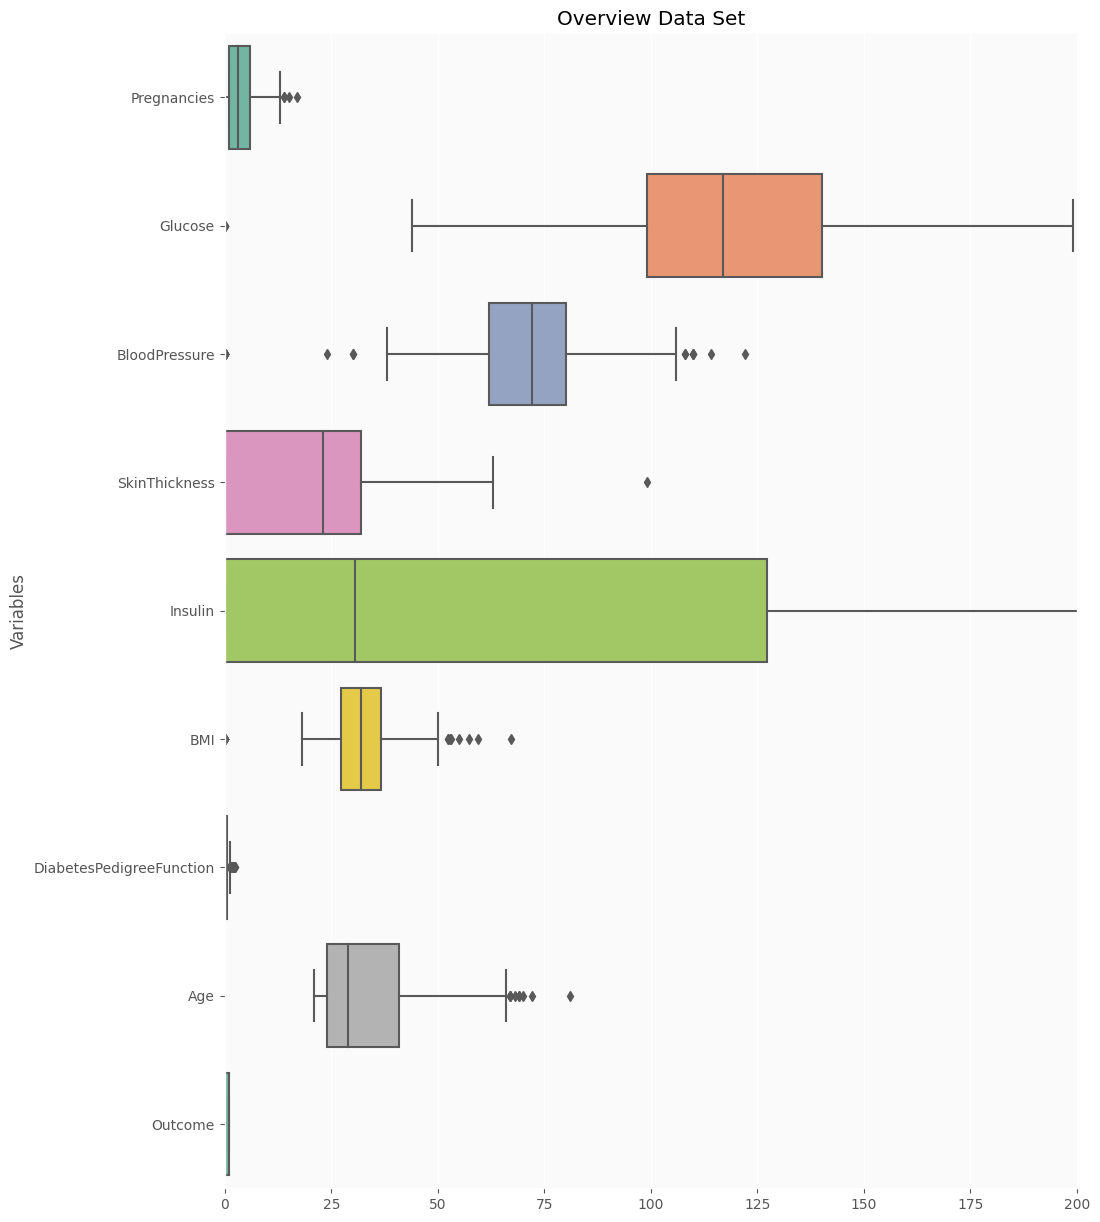

In [292]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

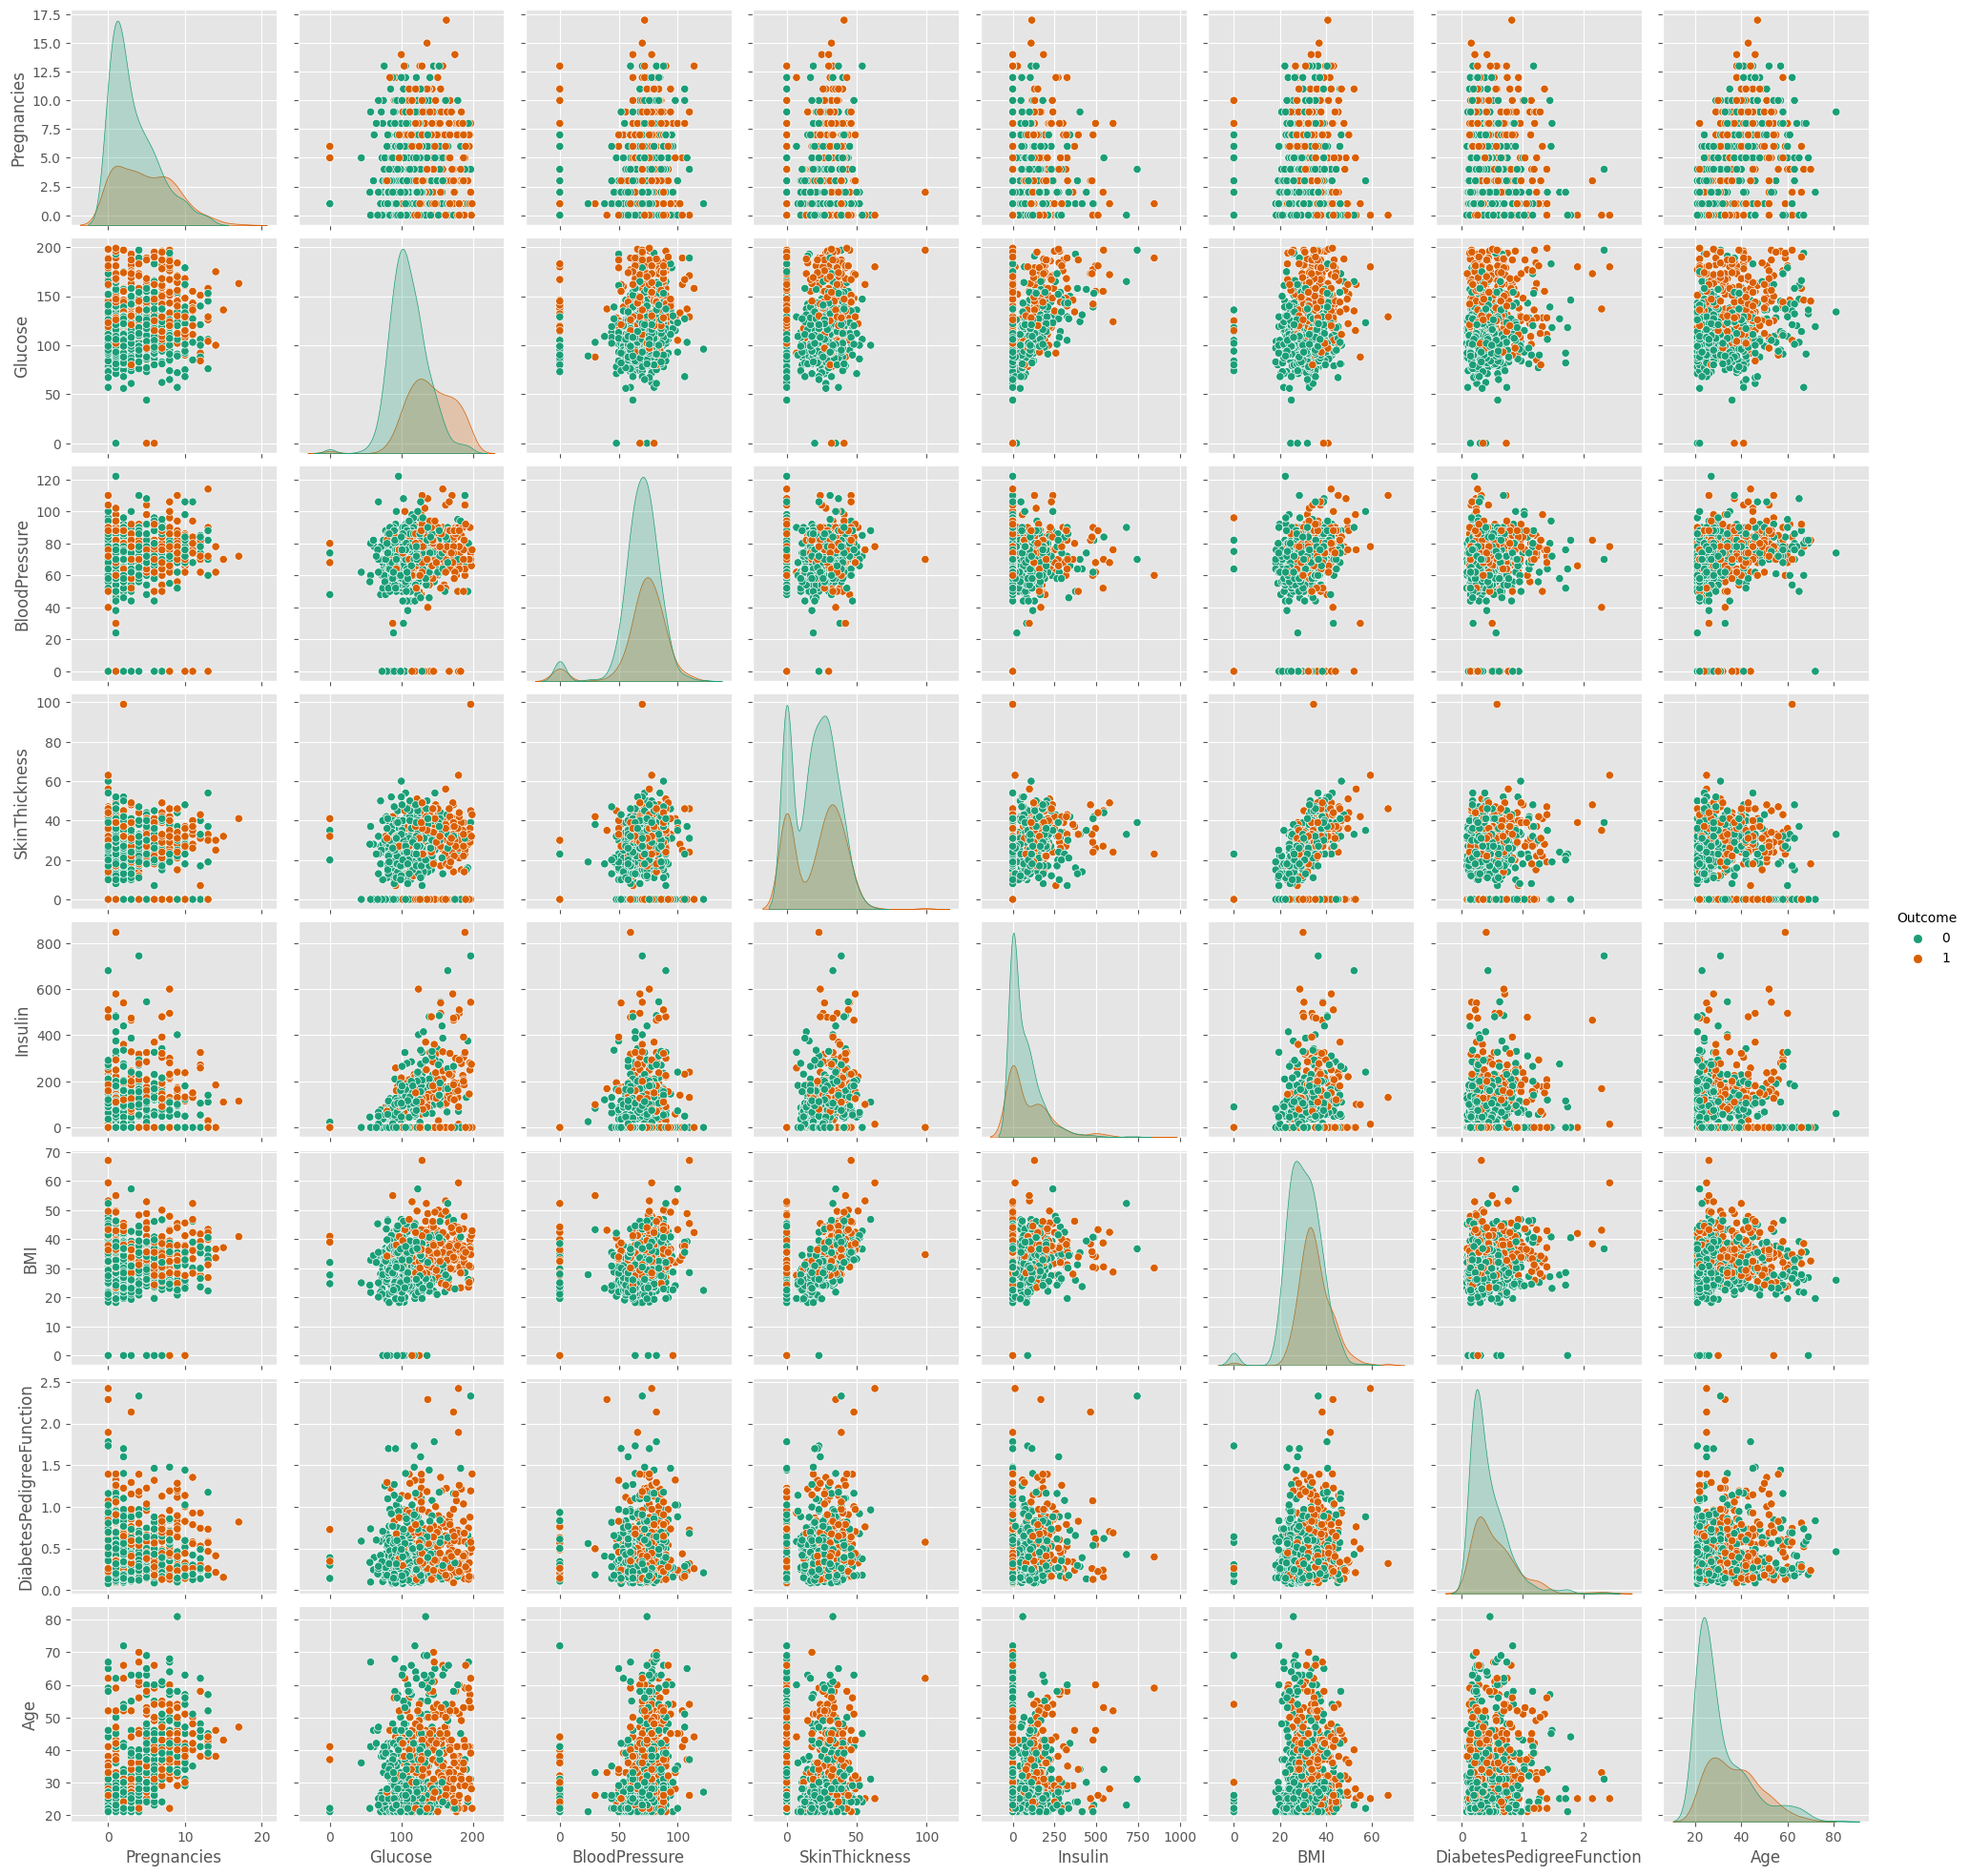

In [298]:
sns.pairplot(data,hue="Outcome")

# 5- classes balancing

In [168]:
df_majority = data[data.Outcome==0]
df_minority = data[data.Outcome==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Outcome.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [189]:
df_upsampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.60,0.35,31,0
3,1,89,66,23,94,28.10,0.17,21,0
5,5,116,74,0,0,25.60,0.20,30,0
7,10,115,0,0,0,35.30,0.13,29,0
10,4,110,92,0,0,37.60,0.19,30,0
...,...,...,...,...,...,...,...,...,...
429,1,95,82,25,180,35.00,0.23,43,1
701,6,125,78,31,0,27.60,0.56,49,1
476,2,105,80,45,191,33.70,0.71,29,1
579,2,197,70,99,0,34.70,0.57,62,1


# 6- Set Boundaries

In [256]:
outliers = df_upsampled[(df_upsampled['Glucose'] > 80) & (df_upsampled['Glucose'] < 140 )]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.60,0.35,31,0
3,1,89,66,23,94,28.10,0.17,21,0
5,5,116,74,0,0,25.60,0.20,30,0
7,10,115,0,0,0,35.30,0.13,29,0
10,4,110,92,0,0,37.60,0.19,30,0
...,...,...,...,...,...,...,...,...,...
243,6,119,50,22,176,27.10,1.32,33,1
23,9,119,80,35,0,29.00,0.26,29,1
429,1,95,82,25,180,35.00,0.23,43,1
701,6,125,78,31,0,27.60,0.56,49,1


# 7- Split Data

In [361]:
X = outliers.drop(['Outcome',"SkinThickness",'BloodPressure','DiabetesPedigreeFunction'],axis=1)
y = outliers['Outcome']

In [362]:
X.shape

(648, 5)

In [363]:
y.shape

(648,)

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [365]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (518, 5) (518,)
Test Set:  (130, 5) (130,)


# 8- Quick Insights

In [366]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.66it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.91,0.91,0.91,0.20
ExtraTreesClassifier,0.88,0.88,0.88,0.89,0.13
LGBMClassifier,0.87,0.88,0.88,0.87,0.10
LabelPropagation,0.86,0.87,0.87,0.86,0.03
LabelSpreading,0.86,0.87,0.87,0.86,0.02
XGBClassifier,0.85,0.86,0.86,0.85,0.13
ExtraTreeClassifier,0.82,0.83,0.83,0.83,0.01
BaggingClassifier,0.84,0.83,0.83,0.84,0.03
DecisionTreeClassifier,0.82,0.82,0.82,0.82,0.02


# 9- Model & Model Evaluation

In [367]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model accuracy score: ",accuracy_score(y_test, model.predict(X_test))*100)

Model accuracy score:  90.76923076923077


In [368]:
outliers.iloc[190]

Pregnancies                  6.00
Glucose                    102.00
BloodPressure               90.00
SkinThickness               39.00
Insulin                      0.00
BMI                         35.70
DiabetesPedigreeFunction     0.67
Age                         28.00
Outcome                      0.00
Name: 410, dtype: float64

In [369]:
outliers[outliers.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
667,10,111,70,27,0,27.50,0.14,40,1
219,5,112,66,0,0,37.80,0.26,41,1
164,0,131,88,0,0,31.60,0.74,32,1
618,9,112,82,24,0,28.20,1.28,50,1
254,12,92,62,7,258,27.60,0.93,44,1
...,...,...,...,...,...,...,...,...,...
243,6,119,50,22,176,27.10,1.32,33,1
23,9,119,80,35,0,29.00,0.26,29,1
429,1,95,82,25,180,35.00,0.23,43,1
701,6,125,78,31,0,27.60,0.56,49,1


In [370]:
X.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [373]:
y_pred_test = model.predict(X_test)

In [394]:
model.predict([[0, 200, 0, 35, 50]])

array([1], dtype=int64)

<AxesSubplot:>

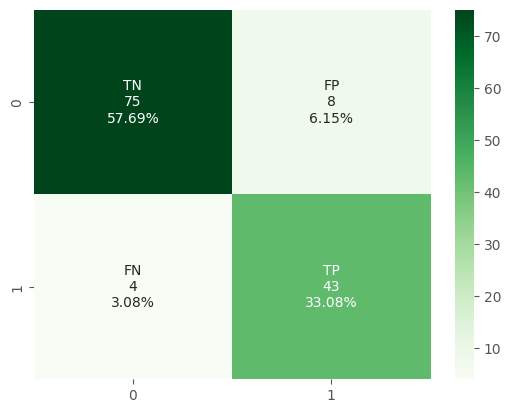

In [376]:
# Create the Confusion Matrix
confusion_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
#[row, column]
TP = confusion_matrix[1, 1]        
TN = confusion_matrix[0, 0]           
FP = confusion_matrix[0, 1]           
FN = confusion_matrix[1, 0]


# Visualize the Matrix
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

# 10- Save Model

In [332]:
pickle.dump(model, open("diabetes.pkl",'wb'))